# **Previsão da emissão de Dióxido de Carbono de veículos**

Por **Gustavo Andrade Tavares**

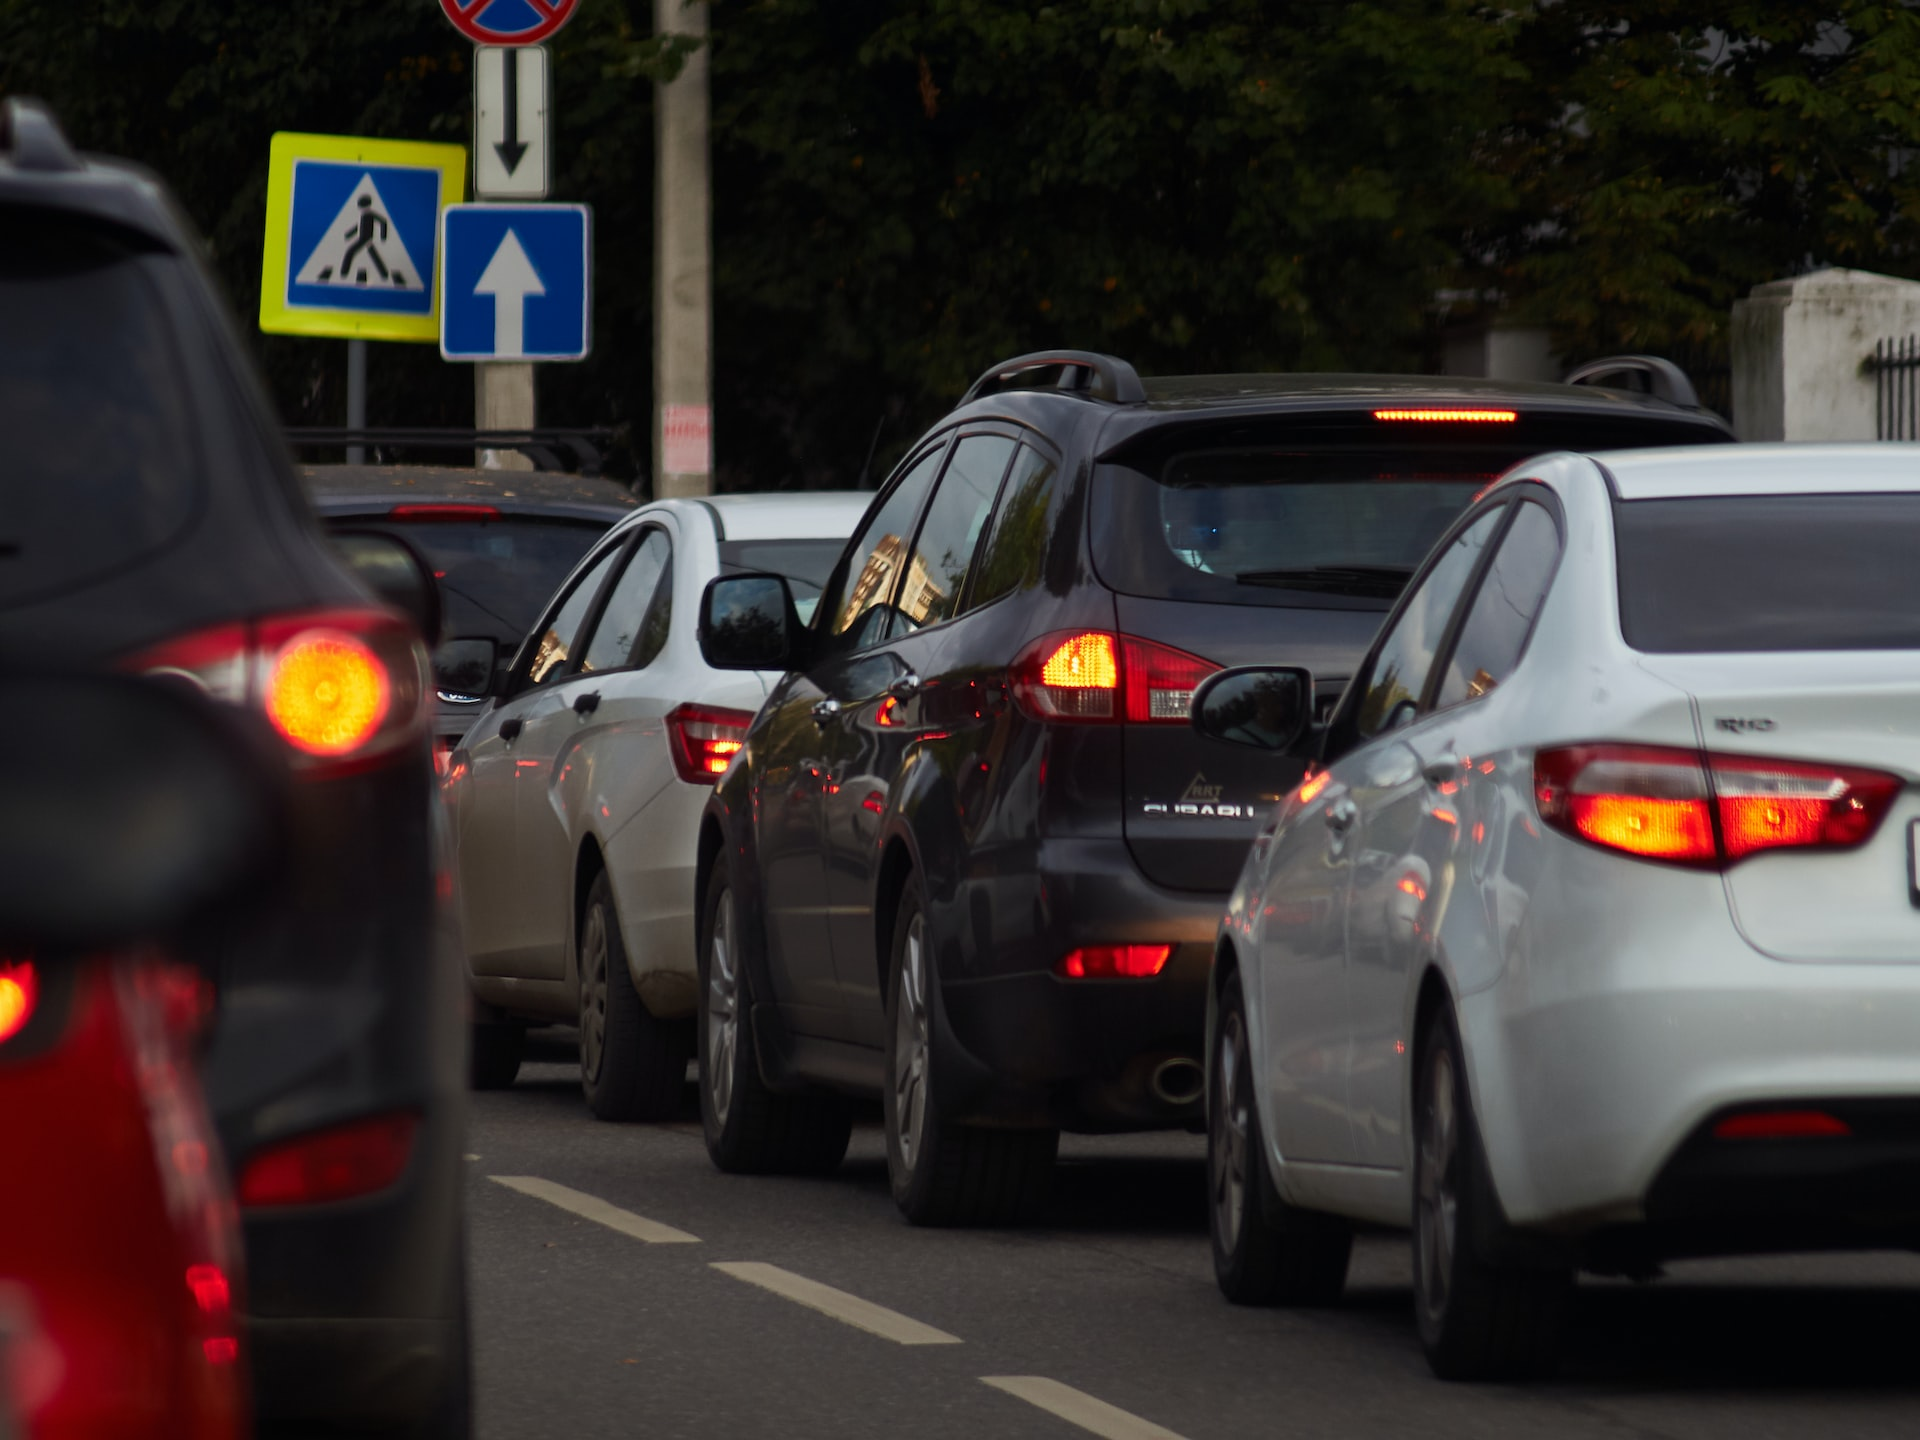

Photo by <a href="https://unsplash.com/@zenitarka?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kathy</a> on <a href="https://unsplash.com/photos/R7nSPG8edVI?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## **1) Introdução**

O conjunto de dados contém informações sobre o consumo de combustível e emissões de $CO_2$ de veículos no Canadá.

Para mais informações, acessar o link: [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

Assim, temos as seguintes variáveis:

*   **MODELYEAR**
*   **MAKE**
*   **MODEL**
*   **VEHICLE CLASS**
*   **ENGINE SIZE**
*   **CYLINDERS**
*   **TRANSMISSION**
*   **FUELTYPE**
*   **FUEL CONSUMPTION in CITY(L/100 km)**
*   **FUEL CONSUMPTION in HWY (L/100 km)**
*   **FUEL CONSUMPTION COMB (L/100 km)**
*   **FUEL CONSUMPTION COMB MPG (miles per gallon (mpg))**
*   **CO2 EMISSIONS (g/km)**

Sendo assim, o objetivo deste projeto é utilizar diferentes modelos de regressão para fazer a predição da emissão de $CO_2$.

## **2) Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

## **3) Abertura e Preparação dos dados**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/gustavo-andrade-tavares/Datasets/main/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Nota-se que não é necessário fazer o preenchimento de valores faltantes, uma vez que, não há valores `NaN` no dataset.

Preparando-se os dados para serem utilizados em modelos de regressão, elimina-se algumas variáveis, tais como: `MODELYEAR`, `MAKE`, `MODEL`, `VEHICLECLASS` e `TRANSMISSION`.

Assim, temos o seguinte conjunto de dados:

In [ ]:
data_reg = df.drop(df.columns[[0,1,2,3,6]], axis=1)
data_reg.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [ ]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                1067 non-null   float64
 1   CYLINDERS                 1067 non-null   int64  
 2   FUELTYPE                  1067 non-null   object 
 3   FUELCONSUMPTION_CITY      1067 non-null   float64
 4   FUELCONSUMPTION_HWY       1067 non-null   float64
 5   FUELCONSUMPTION_COMB      1067 non-null   float64
 6   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 7   CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 66.8+ KB


## **4) Visualização e Exploração dos Dados**

Fazendo-se um resumo descritivo dos dados, temos:

In [ ]:
data_reg.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Analisando-se as ocorrências das observações de cada tipo de combustível, em que



*   $X$: Regular gasoline
*   $Z$: Premium gasoline
*   $D$: Diesel
*   $E$: Ethanol


considera-se o seguinte pie chart:

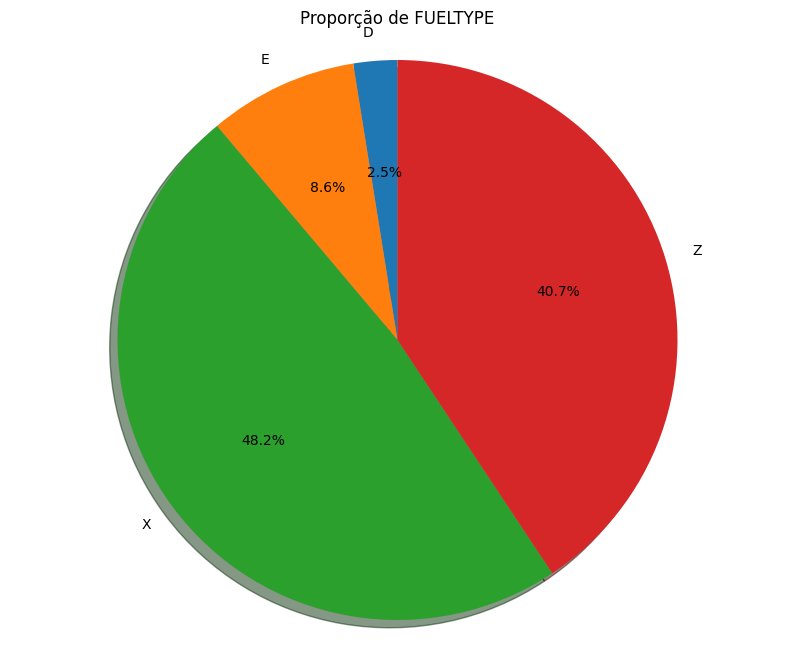

In [ ]:
ft =df.iloc[:,7].values
ft = ft.tolist()

d = ft.count('D')
e = ft.count('E')
x = ft.count('X')
z = ft.count('Z')

freq = [d, e, x, z]
values = np.unique(ft)

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(freq, explode=(0, 0, 0, 0), labels=values, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proporção de FUELTYPE")
plt.show(True)

Ou seja, há mais observações de carros que utilizam gasolina regular ($X$) e premium ($Z$) do que etanol ($E$) e diesel ($D$).

Agora, analisando-se o tipo de combustível em relação a emissão de $CO_2$, considera-se o seguinte gráfico:

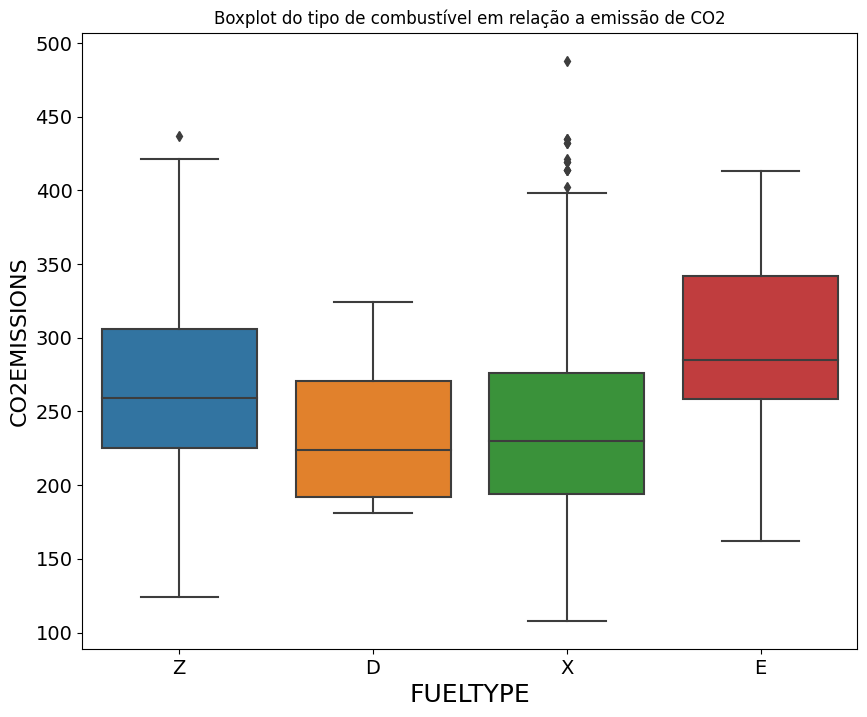

In [ ]:
plt.figure(figsize=(10, 8))
# mostra o boxplot
sns.boxplot(x="FUELTYPE", y="CO2EMISSIONS", data=df)
plt.xlabel('FUELTYPE', fontsize=18)
plt.ylabel('CO2EMISSIONS', fontsize=16)
plt.title("Boxplot do tipo de combustível em relação a emissão de CO2")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

Verificando-se o número de ocorrências de cada tipo de veículo, temos:

In [ ]:
vc = df.VEHICLECLASS.to_numpy()
u_vc = np.unique(vc)
q = []
l = vc.tolist()

for i in range(len(u_vc)):
  q.append(l.count(u_vc[i]))

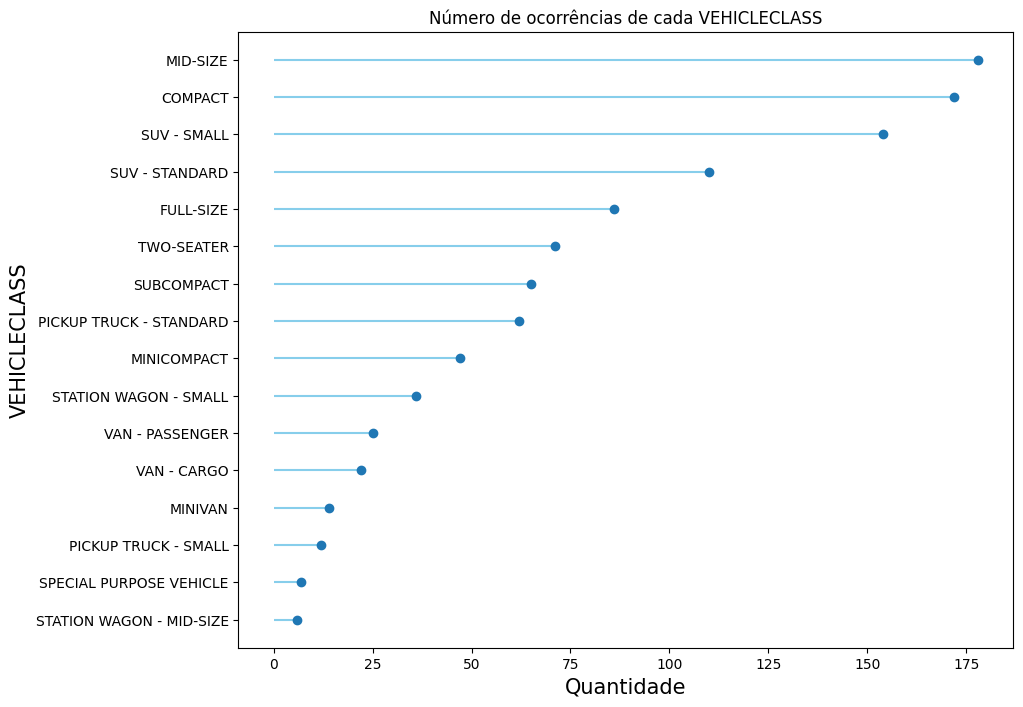

In [ ]:
# Create a dataframe
df_graf = pd.DataFrame({'VEHICLECLASS': u_vc, 'values': q})

# Reorder it based on the values
ordered_df = df_graf.sort_values(by='values')
my_range=range(1,len(df_graf.index)+1)

# The horizontal plot is made using the hline function
plt.figure(figsize=(10,8))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")

# Add titles and axis names
plt.yticks(my_range, ordered_df['VEHICLECLASS'])
plt.title("Número de ocorrências de cada VEHICLECLASS")
plt.xlabel('Quantidade',fontsize = 15)
plt.ylabel('VEHICLECLASS',fontsize = 15)

# Show the plot
plt.show()

Visualizando-se a relação do tipo de veículo com a emissão de $CO_2$, segue que:

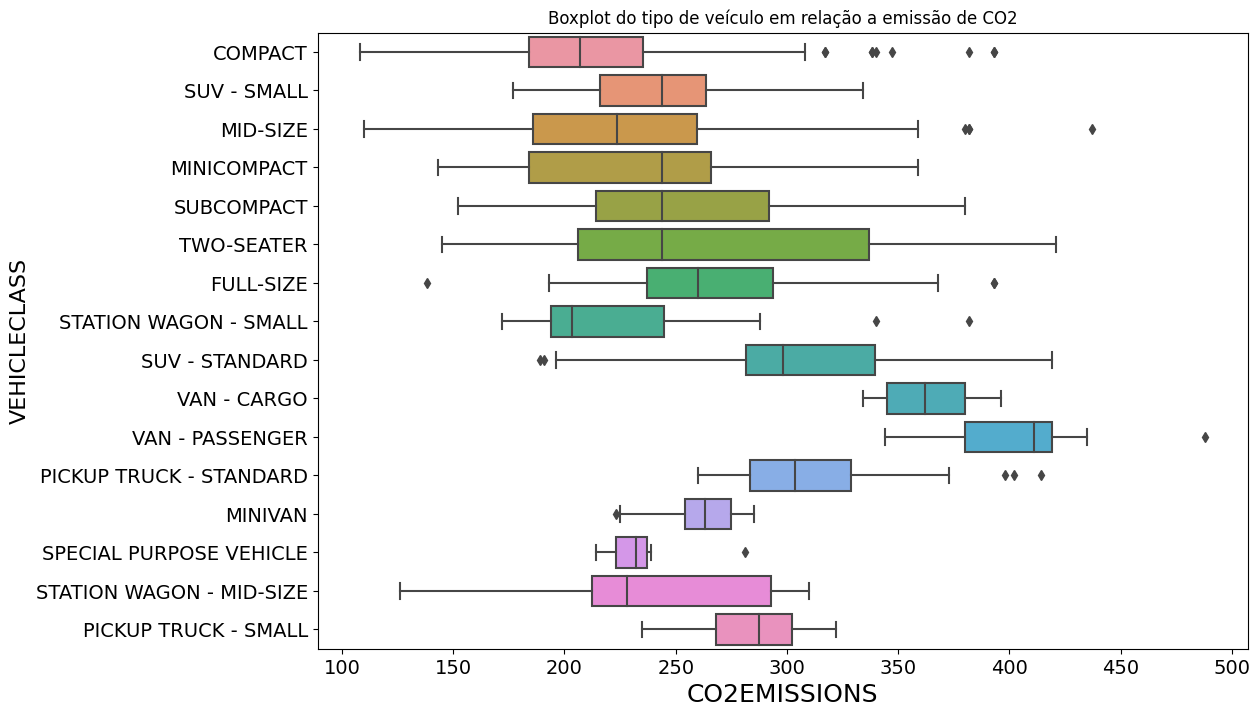

In [ ]:
plt.figure(figsize=(12, 8))
# mostra o boxplot
sns.boxplot(x="CO2EMISSIONS", y="VEHICLECLASS", data=df)
plt.xlabel('CO2EMISSIONS', fontsize=18)
plt.ylabel('VEHICLECLASS', fontsize=16)
plt.title("Boxplot do tipo de veículo em relação a emissão de CO2")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

Nota-se que, na maioria das classes de veículos, os dados são assimétricos, ou seja, há casos em que os 1° e 3° quantis estão distantes da mediana.

Além disso, observa-se que a classe de carro que mais emite dióxido de carbono, é a `VAN-PASSENGER`.

Verificando-se a associação entre as variáveis `VEHICLECLASS` e `FUELTYPE`, considera-se a seguinte tabela:

In [ ]:
# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=df['VEHICLECLASS'], columns=df['FUELTYPE'])

tabela_dupla

FUELTYPE,D,E,X,Z
VEHICLECLASS,,,,
COMPACT,5,6,71,90
FULL-SIZE,1,10,34,41
MID-SIZE,8,6,100,64
MINICOMPACT,0,0,9,38
MINIVAN,0,3,11,0
PICKUP TRUCK - SMALL,0,0,12,0
PICKUP TRUCK - STANDARD,2,18,38,4
SPECIAL PURPOSE VEHICLE,0,0,7,0
STATION WAGON - MID-SIZE,0,0,3,3


Para visualizar as ocorrências, temos o seguinte gráfico:

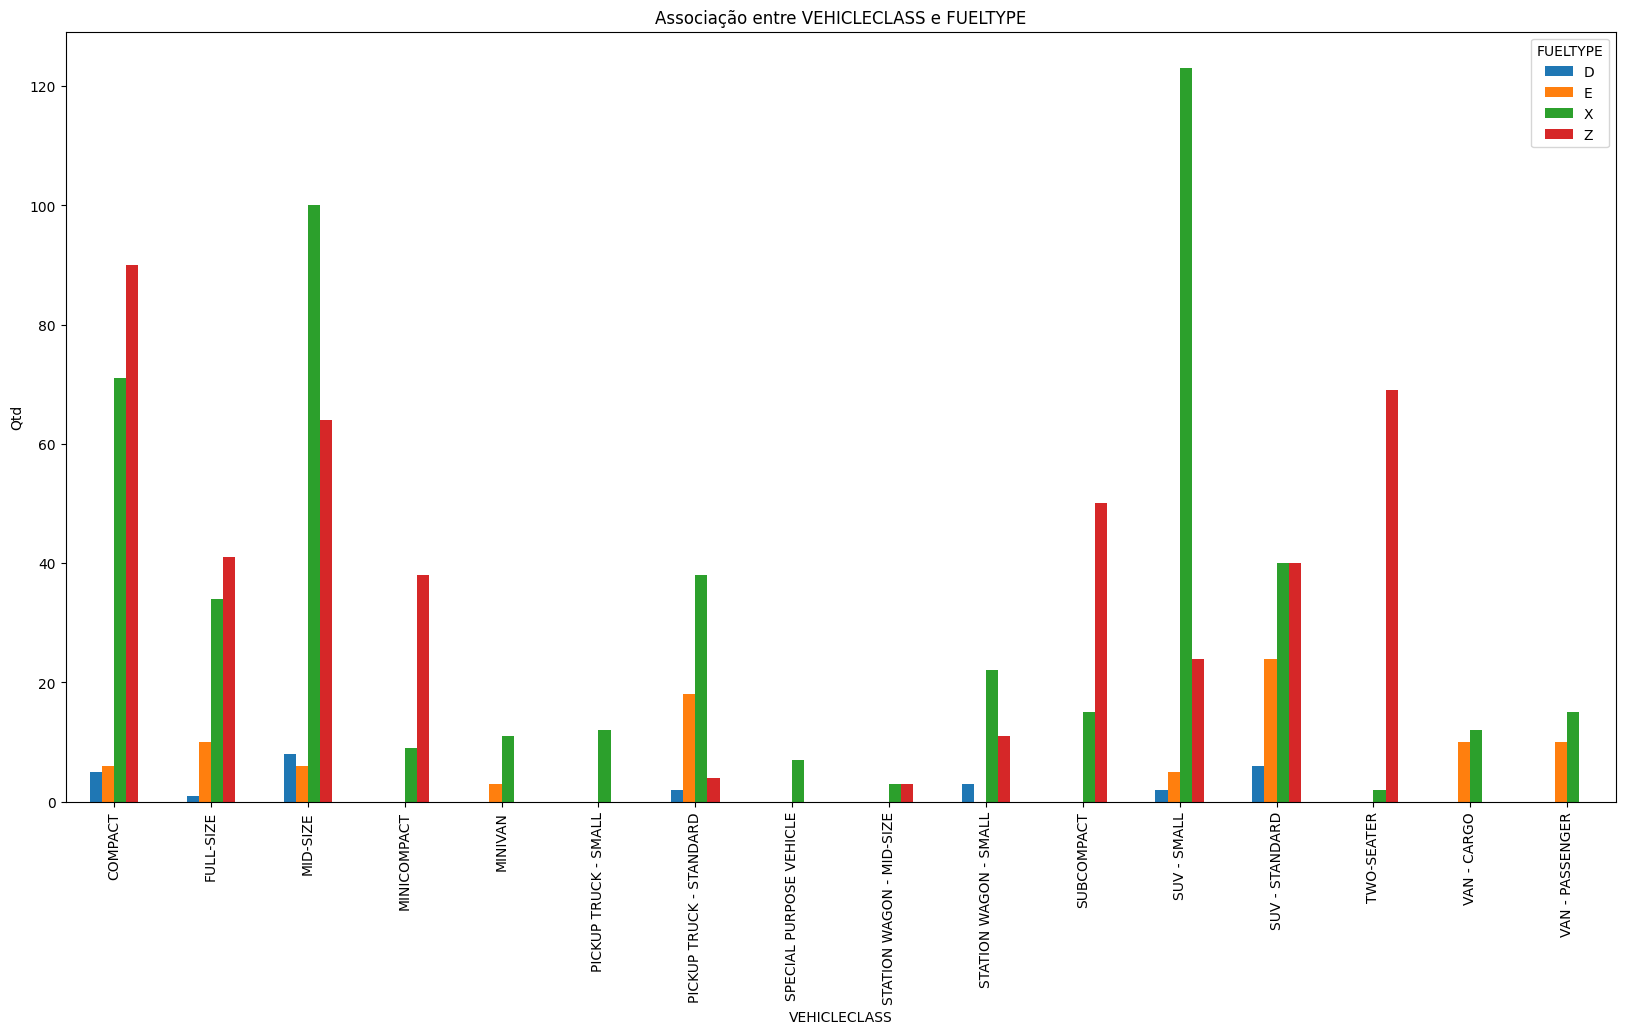

In [ ]:
tabela_dupla.plot.bar(figsize=(20,10),title="Associação entre VEHICLECLASS e FUELTYPE", ylabel="Qtd")

plt.legend(title='FUELTYPE')
plt.show()

Observando-se as relações de cada variável por meio de gráficos scatter plot, temos:

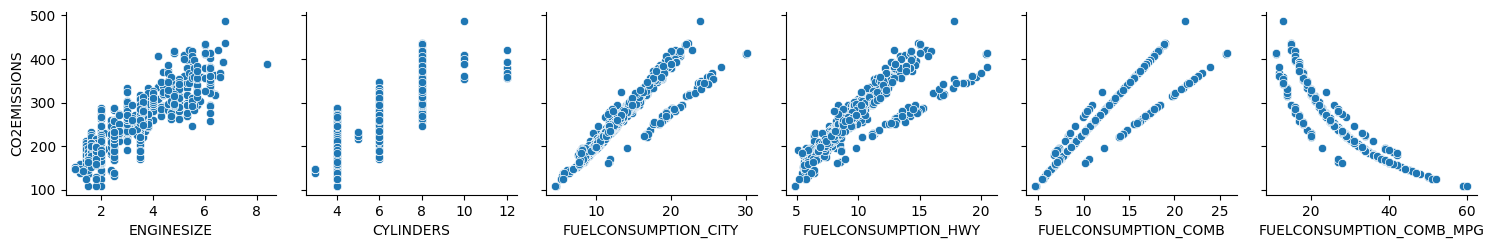

In [ ]:
x_vars = ["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]
y_vars = ["CO2EMISSIONS"]
g = sns.PairGrid(data_reg, x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend();

Pela análise dos scatter plots, nota-se que a variável `FUELCONSUMPTION_COMB_MPG` não tem uma relação linear com a variável resposta.

Além disso, nota-se que as variáveis `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY` e `FUELCONSUMPTION_COMB` têm uma relação aproximadamente linear com a variável `CO2EMISSIONS`.

Aparentemente, há grupos com diferentes relações com a variável resposta, como no caso entre `FUELCONSUMPTION_COMB` e `CO2EMISSIONS`, em que apresenta diferentes relações lineares com a variável resposta.

O gráfico seguinte verifica se a variável `FUELTYPE` influencia na emissão de $CO_2$.

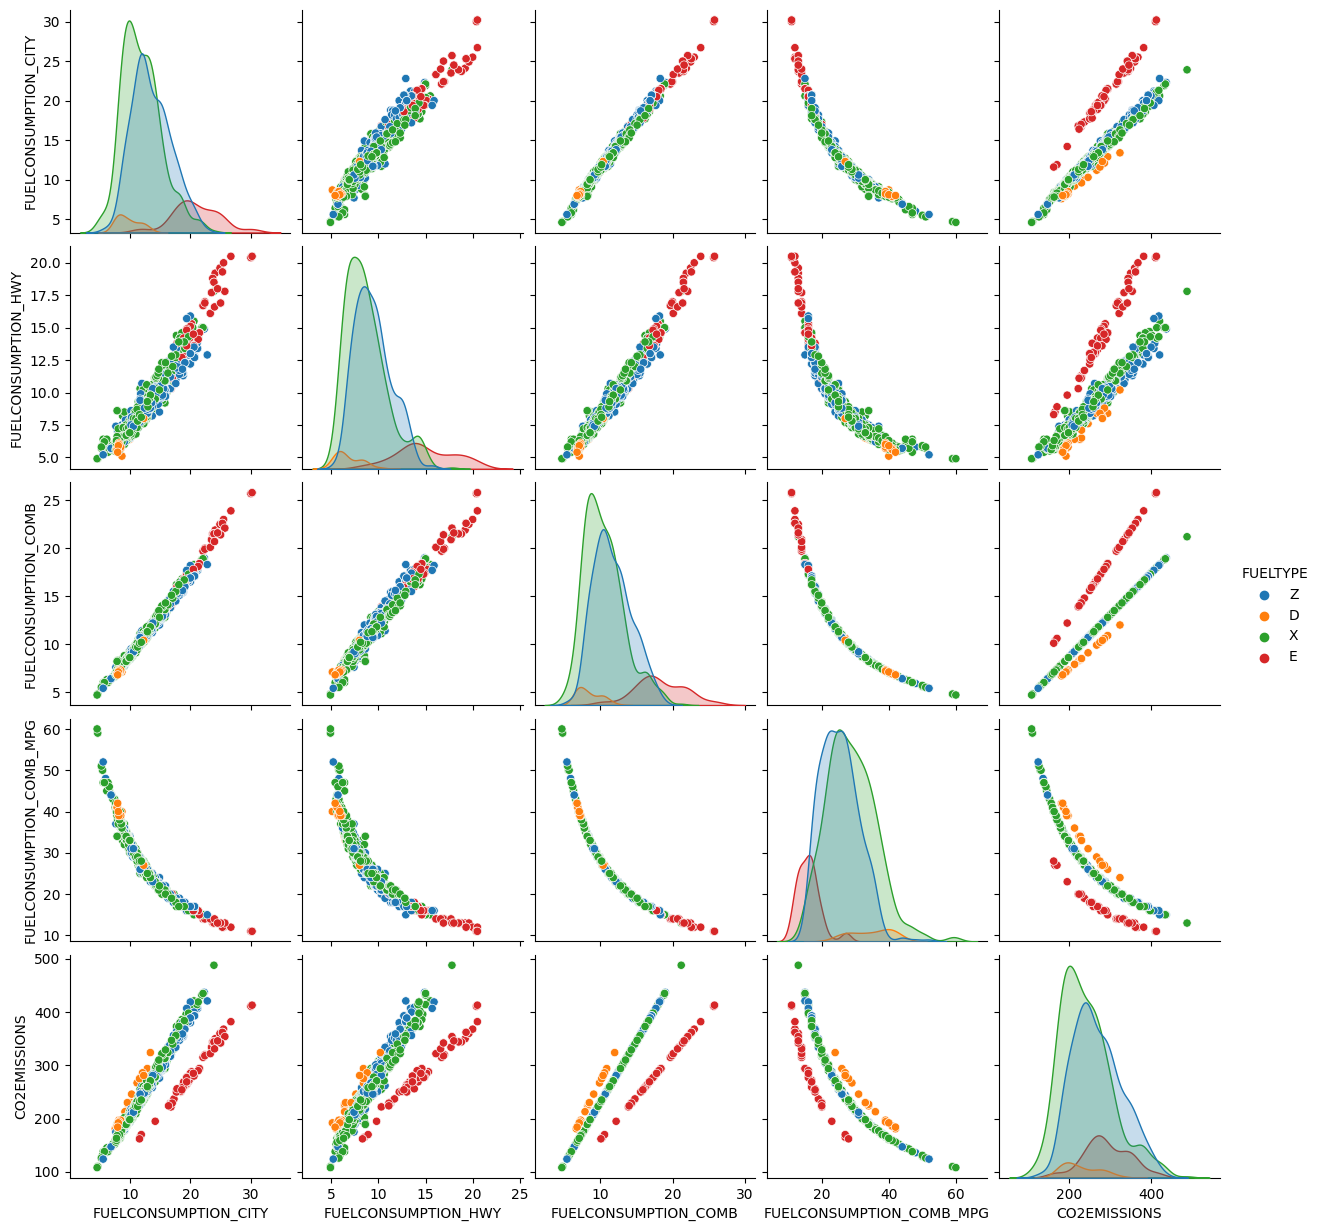

In [ ]:
dados = df.drop(df.columns[[0,1,2,3,4,5,6]], axis=1)
sns.pairplot(dados, hue="FUELTYPE")
plt.show(True)

Por meio deste gráfico, é possível notar que as diferentes relações que ocorrem com a variável `CO2EMISSIONS` são de observações que têm `FUELTYPE` diferentes.

Sendo assim, como o objetivo é fazer a previsão da emissão de $CO_2$ de veículos, e sabendo que veículos com determinados tipos de combustível contribuem de forma diferente, para obter um resultado melhor na regressão, será necessário utilizar Dummy Variables, isto é, variáveis indicadoras para indicar o tipo de combustível do veículo.

Por fim, verificando-se a correlação entre as variáveis, segue que:

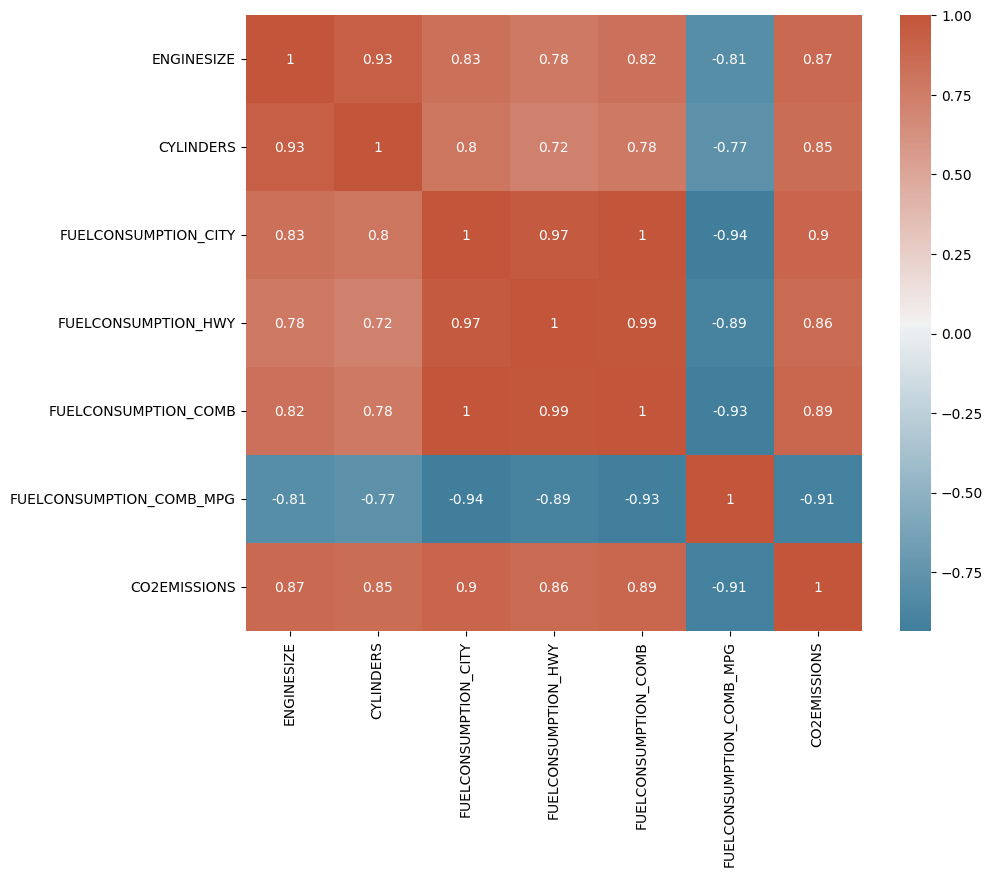

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = data_reg.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    annot = True
)
plt.show(True)

Ou seja, as variáveis estão bastante correlacionadas. Sendo assim, é necessário fazer a seleção de variáveis para serem incluídas nos modelos de regressão para evitar problemas de multicolinearidade.

Como há correlações que são maiores que $0.9$, é possível remover uma das variáveis que tem esses valores de correlação. Assim, temos:

*  A variável `ENGINESIZE` tem correlação igual a $0.93$ com `CYLINDERS`
*  A variável `FUELCONSUMPTION_CITY` tem correlação igual a $0.97$ com `FUELCONSUMPTION_HWY` e correlação igual a $1$ com `FUELCONSUMPTION_COMB`
*  A variável `FUELCONSUMPTION_COMB` tem correlação igual a $0.99$ com `FUELCONSUMPTION_HWY`

Sendo assim, é possível eliminar as variáveis `CYLINDERS`, `FUELCONSUMPTION_CITY` e `FUELCONSUMPTION_HWY` dos modelos de regressão, uma vez que, são redundantes.


## **5) Modelos de regressão com Dummy Variables**

Preparando-se o conjunto de dados para aplicar nos modelos de regressão, obtém-se as Dummy Variables e, também, elimina-se as variáveis que são redundantes:

In [ ]:
data_reg = pd.get_dummies(data_reg)
data_reg.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,1


Como é necessário apenas $k-1$ variáveis indicadoras, assim, exclui-se a variável indicadora mais frequente, que pela análise exploratória, é o `FUELTYPE_X`

In [ ]:
data_reg = data_reg.drop(data_reg.columns[[1,2,3,9]], axis = 1)
data_reg.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_Z
0,2.0,8.5,33,196,0,0,1
1,2.4,9.6,29,221,0,0,1
2,1.5,5.9,48,136,0,0,1
3,3.5,11.1,25,255,0,0,1
4,3.5,10.6,27,244,0,0,1


Além disso, para avaliar a qualidade do ajuste dos modelos de regressão, serão utilizadas as seguintes métricas:



*   **Erro absoluto médio (MAE)**
$$MAE = \dfrac{1}{n} \sum_{j=1}^n |y_j - \hat{y_j}|$$
*   **Erro quadrático médio (MSE)**
$$MSE = \dfrac{1}{n} \sum_{j=1}^n (y_j - \hat{y_j})^2$$
*   **Raiz do erro quadrático médio (RMSE)**
$$RMSE = \sqrt{\dfrac{1}{n} \sum_{j=1}^n (y_j - \hat{y_j})^2}$$
*   **Coeficiente de determinação ($R^2$)**
$$R^2 = 1 - \dfrac{\sum_{j=1}^n (y_j - \hat{y_j})^2}{\sum_{j=1}^n (y_j - \bar{y})^2}$$



### **5.1) Regressão Linear Múltipla**

O modelo de regressão múltipla para $p$ covariáveis é dado por

$$Y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \dots + \beta_pX_{pi} + \epsilon_i, \quad i = 1, \dots, n$$

em que têm as seguintes suposições:



*   $E(\epsilon_i) = 0$,  para $i = 1, \dots, n$
*   $Var(\epsilon_i) = \sigma^2$, para $i = 1, \dots, n$
*   $Cov(\epsilon_i,\epsilon_j) = 0$ para $i,j = 1, \dots, n$ com $i \neq j$

ou então, na forma matricial:
$$Y_{n \times 1} = X_{n \times (p+1)}\beta_{(p+1) \times 1} + \epsilon_{n \times 1}, \quad E(\epsilon) = 0, \quad Var(\epsilon) = \sigma^2 I$$

Além disso, o estimador de mínimos quadrados que minimiza a soma de quadrados dos resíduos, é dado por

$$\hat{\beta} = (X^TX)^{-1}X^TY$$

Utilizando-se a regressão linear múltipla, transforma-se os dados no formato do `Numpy`, para facilitar a manipulação, e utiliza-se o `StandardScaler()`, uma vez que os dados têm escalas diferentes e obtém-se o conjunto de treinamento e teste:

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1)
X = data[:,[0,1,2,4,5,6]]


scaler = StandardScaler()

X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size = p, random_state = 42)

Para fazer inferência sobre os coeficientes da regressão, utiliza-se a função `ols` do pacote `statsmodels`.

Para isso, é necessário transformar o conjunto de treinamento em DataFrame:

In [ ]:
c = ['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG','FUELTYPE_D', 'FUELTYPE_E', 'FUELTYPE_Z']
df1 = pd.DataFrame(x_train, columns=c)
df2 = pd.DataFrame(y_train,columns =['CO2EMISSIONS'])

df_train = df1.join(df2)
df_train.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,FUELTYPE_D,FUELTYPE_E,FUELTYPE_Z,CO2EMISSIONS
0,-1.375251,-1.085225,1.280418,-0.161126,-0.307179,-0.828024,-1.219222
1,0.744544,0.321220,-0.594950,-0.161126,-0.307179,1.207694,0.564728
2,-0.244694,-0.482463,0.342734,6.206329,-0.307179,-0.828024,0.170049
3,-0.244694,-0.051918,-0.193086,-0.161126,-0.307179,1.207694,0.091113
4,1.380482,1.411933,-1.264725,-0.161126,-0.307179,-0.828024,1.953998


In [ ]:
df3 = pd.DataFrame(x_test, columns=c)
df4 = pd.DataFrame(y_test,columns =['CO2EMISSIONS'])

df_test = df3.join(df4)
df_test.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,FUELTYPE_D,FUELTYPE_E,FUELTYPE_Z,CO2EMISSIONS
0,0.956523,0.464735,-0.728905,-0.161126,-0.307179,1.207694,0.754174
1,0.108606,-0.568571,0.342734,-0.161126,-0.307179,-0.828024,-0.556161
2,0.179265,0.349923,-0.594950,-0.161126,-0.307179,1.207694,0.596302
3,-0.244694,-0.568571,0.342734,-0.161126,-0.307179,1.207694,-0.556161
4,-0.951292,-0.740789,0.610643,-0.161126,-0.307179,-0.828024,-0.777181


In [ ]:
model_ols = ols(formula='CO2EMISSIONS ~ ENGINESIZE + FUELCONSUMPTION_COMB + FUELCONSUMPTION_COMB_MPG + FUELTYPE_D + FUELTYPE_E + FUELTYPE_Z', data = df_train).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.891e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:24   Log-Likelihood:                 886.02
No. Observations:                 853   AIC:                            -1758.
Df Residuals:                     846   BIC:                            -1725.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Nota-se que o `p-value` da variável indicadora `FUELTYPE_Z` é alto, portanto, ela não é significante, logo, pode ser retirada:

In [ ]:
model_ols = ols(formula='CO2EMISSIONS ~ ENGINESIZE + FUELCONSUMPTION_COMB + FUELCONSUMPTION_COMB_MPG + FUELTYPE_D + FUELTYPE_E', data = df_train).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.270e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:24   Log-Likelihood:                 885.53
No. Observations:                 853   AIC:                            -1759.
Df Residuals:                     847   BIC:                            -1731.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

O modelo ajustado por regressão linear múltipla considerando cinco covariáveis é:
$$\hat{Y}=-0,00001+0,0415\times X_1+0,9809\times X_2-0,1895\times X_3+0,0858\times X_4-0,4891\times X_5$$

Após selecionar as variáveis para serem incluídas no modelo de regressão linear múltipla, nota-se pelos resultados do `ols` que os erros não são normalmente distribuídos, uma vez que, `Prob(Omnibus) = 0`.

Assim, considera-se também, o gráfico de probabilidade normal, que comprova se os erros têm distribuição normal ou não:

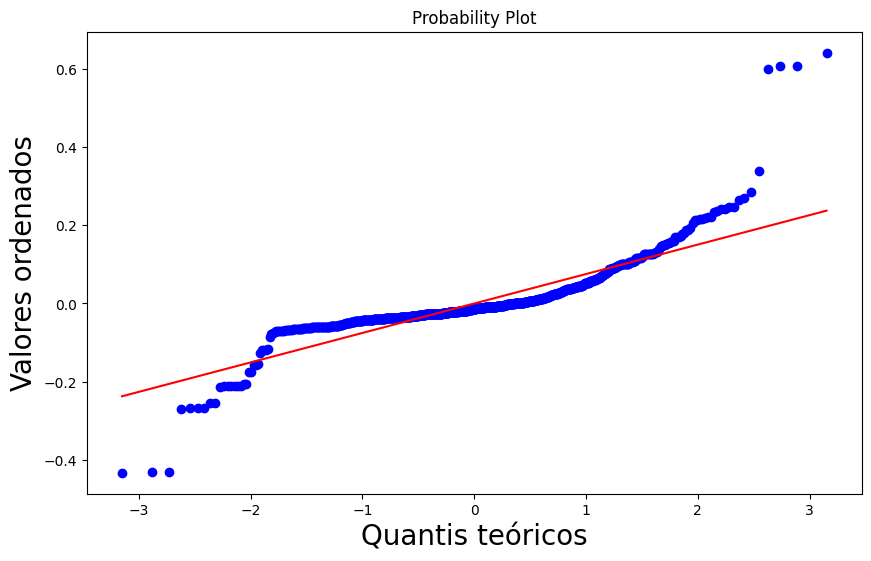

In [ ]:
residuals = model_ols.resid

plt.figure(figsize=(10,6))
stats.probplot(np.sort(residuals), dist="norm",plot=plt)

plt.xlabel('Quantis teóricos', fontsize = 20)
plt.ylabel('Valores ordenados',fontsize = 20)
plt.show(True)

Como os pontos não estão muito alinhados com a reta em vermelho, e também, há presença de outliers, o gráfico indica que os erros não têm distribuição normal.

Além disso, analisando-se o gráfico dos valores preditos com os resíduos, nota-se que os pontos não estão distribuídos aleatoriamente em torno de zero.

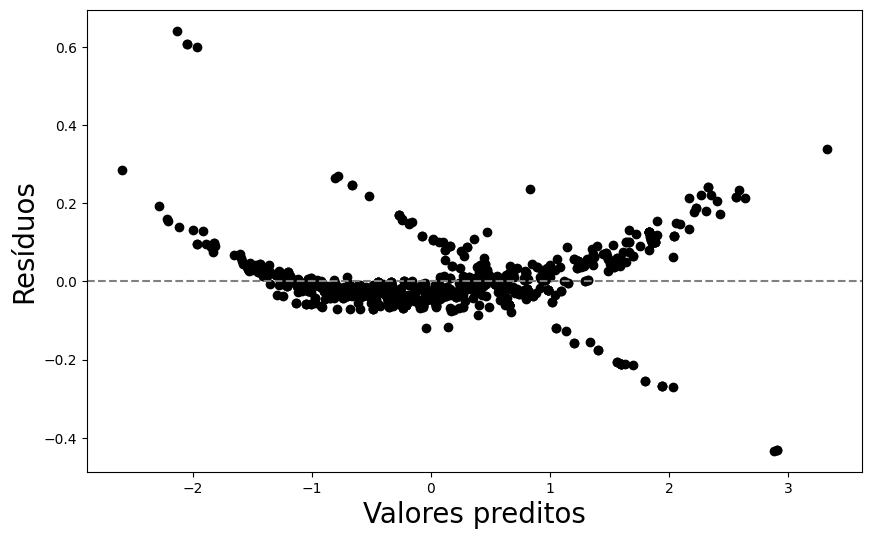

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(model_ols.fittedvalues, residuals,color='black')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.xlabel('Valores preditos',fontsize = 20)
plt.ylabel('Resíduos', fontsize = 20)
plt.show(True)

Sendo assim, como os erros não têm distribuição normal, não será possível utilizar o modelo de regressão múltipla, uma vez que, este modelo assume normalidade dos erros. Uma vez que os dados tem elevada multicolinearidade, é possível que o modelo esteja usando mais parâmetros que o necessário, resultando em baixo viés e alta variância dos parâmetros.

Foi obtida uma amostra dos coeficientes estimados por validação cruzada para estimar a sua variância.

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=50, random_state=13)

v_coef = []

for train_index, test_index in cv.split(X_norm, y_norm):

    x_train, x_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y_norm[train_index], y_norm[test_index]
    df1 = pd.DataFrame(x_train, columns=c)
    df2 = pd.DataFrame(y_train,columns =['CO2EMISSIONS'])
    df_train = df1.join(df2)
    model_ols = ols(formula='CO2EMISSIONS ~ ENGINESIZE + FUELCONSUMPTION_COMB + FUELCONSUMPTION_COMB_MPG + FUELTYPE_D + FUELTYPE_E', data = df_train).fit()
    v_coef.append(list(model_ols.params))

In [ ]:
CV_B1_reg_multi = np.sqrt(np.var(np.array(v_coef)[:,1], ddof=1)) / abs(np.mean(np.array(v_coef)[:,1]))
CV_B2_reg_multi = np.sqrt(np.var(np.array(v_coef)[:,2], ddof=1)) / abs(np.mean(np.array(v_coef)[:,2]))
CV_B3_reg_multi = np.sqrt(np.var(np.array(v_coef)[:,3], ddof=1)) / abs(np.mean(np.array(v_coef)[:,3]))
CV_B4_reg_multi = np.sqrt(np.var(np.array(v_coef)[:,4], ddof=1)) / abs(np.mean(np.array(v_coef)[:,4]))
CV_B5_reg_multi = np.sqrt(np.var(np.array(v_coef)[:,5], ddof=1)) / abs(np.mean(np.array(v_coef)[:,5]))

In [ ]:
print(f'Coeficiente de variação dos coeficientes:\nENGINESIZE: {CV_B1_reg_multi}\nFUELCONSUMPTION_COMB: {CV_B2_reg_multi}\nFUELCONSUMPTION_COMB_MPG: {CV_B3_reg_multi}\nFUELTYPE_D: {CV_B4_reg_multi}\nFUELTYPE_E: {CV_B5_reg_multi}')

Coeficiente de variação dos coeficientes:
ENGINESIZE: 0.08454678210778542
FUELCONSUMPTION_COMB: 0.015930609248740766
FUELCONSUMPTION_COMB_MPG: 0.06150336551146281
FUELTYPE_D: 0.016271470484221826
FUELTYPE_E: 0.012386993627291948


Para fazer a predição da variável `CO2EMISSIONS`, foram utilizados outros modelos que consideram a inclusão de uma penalidade aos coeficientes para reduzir a sua variância:



*   Lasso Regression
*   Ridge Regression
*   Elastic Net Regression



### **5.2) Lasso Regression**

A regressão Lasso tem como finalidade encontrar um estimador de uma regressão linear que possui risco menor que o de mínimos quadrados. Ou seja, a ideia é reduzir a variância do estimador de
mínimos quadrados. Assim, o estimador de mínimos quadrados sujeito à penalização $L_1$ é dado por

$$\hat{\vec{\beta}}_{Lasso}(λ) = argmin_{\vec{\beta}} \left\{\sum_{i=1}^n (y_i - \vec{\beta}^T x_i)^2 + \lambda \sum_{j=1}^d |\beta_j|\right\} $$


Para utilizar este modelo, prepara-se os dados transformando-se para o formato do `Numpy`, utiliza-se o `StandardScaler()` e obtém-se os conjuntos de treinamento e teste:

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1)
X = data[:,[0,1,2,4,5,6]]

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Para escolher o melhor parâmetro `alpha` para ser incluído no modelo, temos:

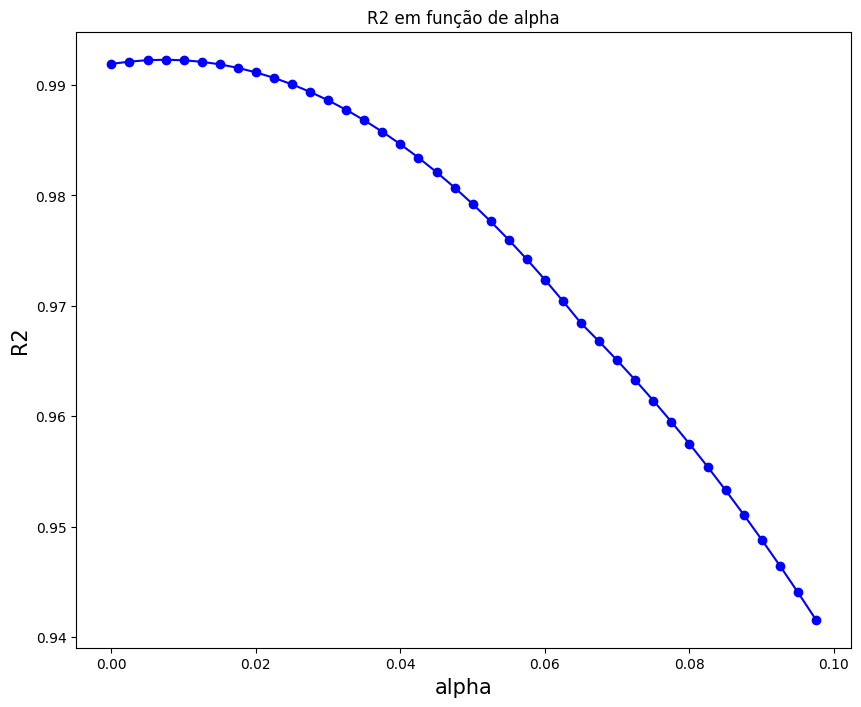

In [ ]:
vR2 = []
valpha = []
for alpha in np.arange(0.0,0.1,0.0025):
    lasso = Lasso(alpha = alpha, max_iter=1000000)
    lasso.fit(x_train, y_train)             # Fit a lasso regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.figure(figsize=(10,8))
plt.plot(valpha, vR2, '-bo')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.title("R2 em função de alpha")
plt.show(True)

In [ ]:
print("O valor de alpha que maximiza R2 é: ",valpha[np.argmax(vR2)])

O valor de alpha que maximiza R2 é:  0.0075


Assim, o valor de `alpha` que maximiza o $R^2$ é $0.0075$

Além disso, é possível selecionar as variáveis a serem incluídas no modelo, uma vez que, as variáveis que não são importantes recebem o coeficiente igual a zero.

In [ ]:
lasso = Lasso(alpha = 0.0075,max_iter=1000000)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: ENGINESIZE, FUELCONSUMPTION_COMB ,FUELCONSUMPTION_COMB_MPG', 'FUELTYPE_D', 'FUELTYPE_E', 'FUELTYPE_Z')
lasso.coef_

Coeficientes: ENGINESIZE, FUELCONSUMPTION_COMB ,FUELCONSUMPTION_COMB_MPG FUELTYPE_D FUELTYPE_E FUELTYPE_Z


array([ 0.05456262,  0.96388356, -0.17660139,  0.07345611, -0.47068805,
        0.        ])

Nota-se que a variável indicadora `FUELTYPE_Z` recebe coeficiente igual a zero, sendo assim, esta pode ser removida, pois não é importante para a regressão.

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1)
X = data[:,[0,1,2,4,5]]

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Após remover a variável `FUELTYPE_Z`, utiliza-se o modelo Lasso com o valor `alpha = 0.0075`.

In [ ]:
alpha = 0.0075

lasso = Lasso(alpha=alpha, max_iter=100000)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [ ]:
print(f'Coeficientes:\nintercepto: {lasso.intercept_[0]}\nENGINESIZE: {lasso.coef_[0]}\nFUELCONSUMPTION_COMB: {lasso.coef_[1]}\nFUELCONSUMPTION_COMB_MPG: {lasso.coef_[2]}\nFUELTYPE_D: {lasso.coef_[3]}\nFUELTYPE_E: {lasso.coef_[4]}')

Coeficientes:
intercepto: -0.0001718402949456438
ENGINESIZE: 0.0545807155652849
FUELCONSUMPTION_COMB: 0.9638400154231126
FUELCONSUMPTION_COMB_MPG: -0.1766215864856144
FUELTYPE_D: 0.07345574474640881
FUELTYPE_E: -0.4706756568582194


O modelo ajustado por LASSO regression é:

$$\hat{Y}=-0,00017+0,0546\times X_1+0,9638\times X_2-0,1766\times X_3+0,0735\times X_4-0,4707\times X_5E$$

Comparando os valores preditos com os valores da base de teste:

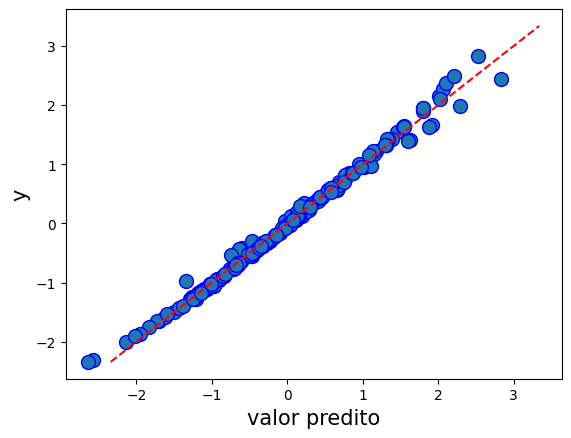

In [ ]:
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("valor predito", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Verificando-se as métricas do modelo, temos:

In [ ]:
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.992285660407159
MAE: 0.05612882148413887
MSE: 0.007950176262280796
RMSE: 0.08916376092494527


Observa-se que o modelo performa bem, uma vez que tem um valor de $R^2$ alto e valores de $MAE$ e $MSE$ baixos.

Utilizando-se diferentes divisões dos conjuntos de treinamento e teste, obtém-se os valores médios das métricas:

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=50, random_state=13)
v_r2 = []
v_mae = []
v_mse = []
v_rmse = []
v_coef = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Lasso(alpha=0.0075, max_iter=100000)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    v_r2.append(r2)
    v_mae.append(mae)
    v_mse.append(mse)
    v_rmse.append(rmse)
    v_coef.append(list(model.coef_))

r2_lasso = np.mean(v_r2)
mae_lasso = np.mean(v_mae)
mse_lasso = np.mean(v_mse)
rmse_lasso = np.mean(v_rmse)

print("R2 médio:", r2_lasso)
print("MAE médio:", mae_lasso)
print("MSE médio:", mse_lasso)
print("RMSE médio:", rmse_lasso)

R2 médio: 0.9917286123045924
MAE médio: 0.05779943206129287
MSE médio: 0.008256942558222156
RMSE médio: 0.09045360381909091


In [ ]:
CV_B1_lasso = np.sqrt(np.var(np.array(v_coef)[:,0], ddof=1)) / abs(np.mean(np.array(v_coef)[:,0]))
CV_B2_lasso = np.sqrt(np.var(np.array(v_coef)[:,1], ddof=1)) / abs(np.mean(np.array(v_coef)[:,1]))
CV_B3_lasso = np.sqrt(np.var(np.array(v_coef)[:,2], ddof=1)) / abs(np.mean(np.array(v_coef)[:,2]))
CV_B4_lasso = np.sqrt(np.var(np.array(v_coef)[:,3], ddof=1)) / abs(np.mean(np.array(v_coef)[:,3]))
CV_B5_lasso = np.sqrt(np.var(np.array(v_coef)[:,4], ddof=1)) / abs(np.mean(np.array(v_coef)[:,4]))

In [ ]:
print(f'Coeficiente de variação dos coeficientes:\nENGINESIZE: {CV_B1_lasso}\nFUELCONSUMPTION_COMB: {CV_B2_lasso}\nFUELCONSUMPTION_COMB_MPG: {CV_B3_lasso}\nFUELTYPE_D: {CV_B4_lasso}\nFUELTYPE_E: {CV_B5_lasso}')

Coeficiente de variação dos coeficientes:
ENGINESIZE: 0.065165647568635
FUELCONSUMPTION_COMB: 0.015663693757172758
FUELCONSUMPTION_COMB_MPG: 0.05353827400625971
FUELTYPE_D: 0.023883060646971523
FUELTYPE_E: 0.011773210946866536


Nota-se que a variância dos coeficientes diminuiu em relação aos valores do modelo de regressão linear múltipla.

### **5.3) Ridge Regression**

A regressão Ridge, assim como o Lasso, tem como finalidade encontrar um estimador de uma regressão linear que possui risco menor que o de mínimos quadrados. Assim, o estimador de mínimos quadrados sujeito à penalização $L_2$ é dado por

$$\hat{\vec{\beta}}_{Ridge}(λ) = argmin_{\vec{\beta}} \left\{\sum_{i=1}^n (y_i - \vec{\beta}^T x_i)^2 + \lambda \sum_{j=1}^d \beta_j^2 \right\} $$

Para o Ridge Regression, também, faz-se o mesmo procedimento na preparação dos dados. Além disso, como foi obtido que a variável `FUELTYPE_Z` não é significante, elimina-se esta variável.

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1)
X = data[:,[0,1,2,4,5]]

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Para encontrar o valor de alpha do modelo Ridge Regression, testa-se o modelo para diferentes valores de alpha, e seleciona-se o valor de alpha que maximiza $R^2$:

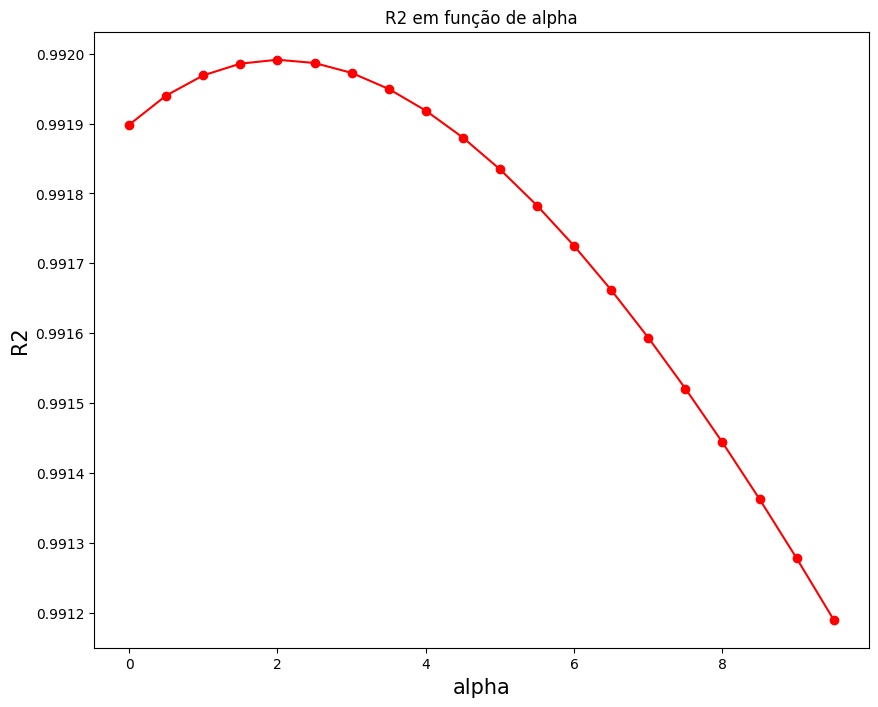

In [ ]:
vR2 = []
valpha = []
for alpha in np.arange(0,10,0.5):
    ridge = Ridge(alpha = alpha, max_iter=1000000)
    ridge.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.figure(figsize=(10,8))
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.title("R2 em função de alpha")
plt.show(True)

In [ ]:
print("O valor de alpha que maximiza R2 é: ",valpha[np.argmax(vR2)])

O valor de alpha que maximiza R2 é:  2.0


In [ ]:
alpha = 2

ridge = Ridge(alpha=alpha, max_iter=100000)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

In [ ]:
print(f'Coeficientes:\nintercepto: {ridge.intercept_[0]}\nENGINESIZE: {ridge.coef_[0][0]}\nFUELCONSUMPTION_COMB: {ridge.coef_[0][1]}\nFUELCONSUMPTION_COMB_MPG: {ridge.coef_[0][2]}\nFUELTYPE_D: {ridge.coef_[0][3]}\nFUELTYPE_E: {ridge.coef_[0][4]}')

Coeficientes:
intercepto: -0.0004619966886672891
ENGINESIZE: 0.05162062951456577
FUELCONSUMPTION_COMB: 0.9714366745114019
FUELCONSUMPTION_COMB_MPG: -0.187238368455574
FUELTYPE_D: 0.08269316787741163
FUELTYPE_E: -0.4847035761660975


O modelo ajustado por ridge regression é:
$$\hat{Y}=-0,00046+0,0516\times X_1+0,9714\times X_2-0,1872\times X_3+0,0827\times X_4-0,4847\times X_5$$

Comparando os valores preditos com os valores da base de teste:

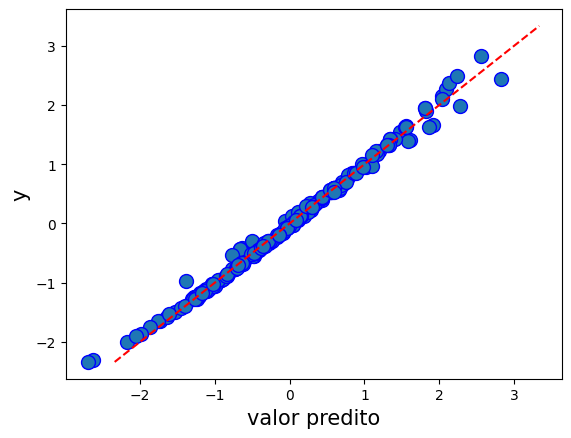

In [ ]:
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("valor predito", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [ ]:
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9919913714121125
MAE: 0.05566791628809748
MSE: 0.008253462026993764
RMSE: 0.09084856645535891


Semelhantemente ao modelo Lasso Regression, o Ridge Regression também performa bem, pois os valores das métricas são bons.

Assim, obtendo-se os valores médios das métricas, segue que:

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=50, random_state=13)
v_r2 = []
v_mae = []
v_mse = []
v_rmse = []
v_coef = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Ridge(alpha=2, max_iter=100000)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    v_r2.append(r2)
    v_mae.append(mae)
    v_mse.append(mse)
    v_rmse.append(rmse)
    v_coef.append(model.coef_[0])

r2_ridge = np.mean(v_r2)
mae_ridge = np.mean(v_mae)
mse_ridge = np.mean(v_mse)
rmse_ridge = np.mean(v_rmse)

print("R2 médio:", r2_ridge)
print("MAE médio:", mae_ridge)
print("MSE médio:", mse_ridge)
print("RMSE médio:", rmse_ridge)

R2 médio: 0.9920518684558782
MAE médio: 0.055658266430019844
MSE médio: 0.007926321964049111
RMSE médio: 0.08851092728813485


In [ ]:
CV_B1_ridge = np.sqrt(np.var(np.array(v_coef)[:,0], ddof=1)) / abs(np.mean(np.array(v_coef)[:,0]))
CV_B2_ridge = np.sqrt(np.var(np.array(v_coef)[:,1], ddof=1)) / abs(np.mean(np.array(v_coef)[:,1]))
CV_B3_ridge = np.sqrt(np.var(np.array(v_coef)[:,2], ddof=1)) / abs(np.mean(np.array(v_coef)[:,2]))
CV_B4_ridge = np.sqrt(np.var(np.array(v_coef)[:,3], ddof=1)) / abs(np.mean(np.array(v_coef)[:,3]))
CV_B5_ridge = np.sqrt(np.var(np.array(v_coef)[:,4], ddof=1)) / abs(np.mean(np.array(v_coef)[:,4]))

In [ ]:
print(f'Coeficiente de variação dos coeficientes:\nENGINESIZE: {CV_B1_ridge}\nFUELCONSUMPTION_COMB: {CV_B2_ridge}\nFUELCONSUMPTION_COMB_MPG: {CV_B3_ridge}\nFUELTYPE_D: {CV_B4_ridge}\nFUELTYPE_E: {CV_B5_ridge}')

Coeficiente de variação dos coeficientes:
ENGINESIZE: 0.06557901525113573
FUELCONSUMPTION_COMB: 0.014971645447305303
FUELCONSUMPTION_COMB_MPG: 0.05206787057615657
FUELTYPE_D: 0.016486944355301937
FUELTYPE_E: 0.011744013763716098


Nota-se que, assim como LASSO regression, a variância dos coeficientes diminuiu em relação aos valores do modelo de regressão linear múltipla.

### **5.4) Elastic Net**

A penalização $Elastic$ $Net$ combina as penalizações $L_1$ e $L_2$. Assim, a ideia é encontrar os coeficientes que minimizem a seguinte quantidade

$$\hat{\vec{\beta}}_{EN}(\lambda_1,\lambda_2) = argmin_{\vec{\beta}} \left\{\sum_{i=1}^n (y_i - \vec{\beta}^T x_i)^2 + \lambda_1 \sum_{j=1}^d \beta_j^2 + \lambda_2 \sum_{j=1}^d |\beta_j|\right\} $$

Por fim, utilizando-se o modelo Elastic Net, faz-se o mesmo procedimento:

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1)
X = data[:,[0,1,2,4,5]]

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Para encontrar os melhores valores dos parâmetros `alpha` e `l1_ratio` do modelo, utiliza-se `ElasticNetCV`:

In [ ]:
# Encontra alpha e l1_ratio
e_n_cv = ElasticNetCV(cv = 10).fit(x_train,y_train)

alpha = e_n_cv.alpha_
l1 = e_n_cv.l1_ratio_

print('alpha: ',alpha)
print('l1_ratio: ',l1)

alpha:  0.0017664290936688421
l1_ratio:  0.5


Aplicando-se esses parâmetros no modelo, segue que:

In [ ]:
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=100000)
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_test)

In [ ]:
print(f'Coeficientes:\nintercepto: {elastic_net.intercept_[0]}\nENGINESIZE: {elastic_net.coef_[0]}\nFUELCONSUMPTION_COMB: {elastic_net.coef_[1]}\nFUELCONSUMPTION_COMB_MPG: {elastic_net.coef_[2]}\nFUELTYPE_D: {elastic_net.coef_[3]}\nFUELTYPE_E: {elastic_net.coef_[4]}')

Coeficientes:
intercepto: -0.000420344244766592
ENGINESIZE: 0.046438321926287114
FUELCONSUMPTION_COMB: 0.9883821357793727
FUELCONSUMPTION_COMB_MPG: -0.1763759442707005
FUELTYPE_D: 0.08179517215684996
FUELTYPE_E: -0.4885861441035776


O modelo ajustado por elastic net regression é:
$$\hat{Y}=-0,00042+0,0464\times X_1+0,9884\times X_2-0,1764\times X_3+0,0818\times X_4-0,4886\times X_5$$

Comparando os valores preditos com os valores da base de teste:

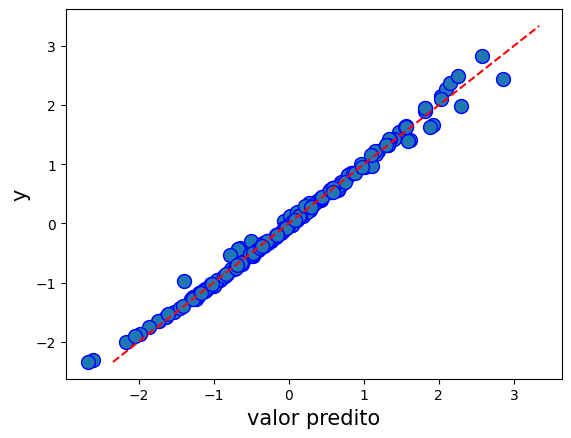

In [ ]:
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("valor predito", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Obtendo-se as métricas:

In [ ]:
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9920311552322657
MAE: 0.05443433395394566
MSE: 0.008212461967455465
RMSE: 0.09062263496199757


Semelhantemente aos dois modelos anteriores, o modelo ElasticNet também retorna resultados muito bons.

Obtendo-se os valores médios das métricas, temos:

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=50, random_state=13)
v_r2 = []
v_mae = []
v_mse = []
v_rmse = []
v_coef = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=100000)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    v_r2.append(r2)
    v_mae.append(mae)
    v_mse.append(mse)
    v_rmse.append(rmse)
    v_coef.append(list(model.coef_))

r2_elastic_net = np.mean(v_r2)
mae_elastic_net = np.mean(v_mae)
mse_elastic_net = np.mean(v_mse)
rmse_elastic_net = np.mean(v_rmse)

print("R2 médio:", r2_elastic_net)
print("MAE médio:", mae_elastic_net)
print("MSE médio:", mse_elastic_net)
print("RMSE médio:", rmse_elastic_net)

R2 médio: 0.9920871196447567
MAE médio: 0.054409909429141805
MSE médio: 0.007890056882562387
RMSE médio: 0.0882537021402529


In [ ]:
CV_B1_elastic = np.sqrt(np.var(np.array(v_coef)[:,0], ddof=1)) / abs(np.mean(np.array(v_coef)[:,0]))
CV_B2_elastic = np.sqrt(np.var(np.array(v_coef)[:,1], ddof=1)) / abs(np.mean(np.array(v_coef)[:,1]))
CV_B3_elastic = np.sqrt(np.var(np.array(v_coef)[:,2], ddof=1)) / abs(np.mean(np.array(v_coef)[:,2]))
CV_B4_elastic = np.sqrt(np.var(np.array(v_coef)[:,3], ddof=1)) / abs(np.mean(np.array(v_coef)[:,3]))
CV_B5_elastic = np.sqrt(np.var(np.array(v_coef)[:,4], ddof=1)) / abs(np.mean(np.array(v_coef)[:,4]))

In [ ]:
print(f'Coeficiente de variação dos coeficientes:\nENGINESIZE: {CV_B1_elastic}\nFUELCONSUMPTION_COMB: {CV_B2_elastic}\nFUELCONSUMPTION_COMB_MPG: {CV_B3_elastic}\nFUELTYPE_D: {CV_B4_elastic}\nFUELTYPE_E: {CV_B5_elastic}')

Coeficiente de variação dos coeficientes:
ENGINESIZE: 0.07367822455792913
FUELCONSUMPTION_COMB: 0.015525535388627784
FUELCONSUMPTION_COMB_MPG: 0.05695254485967898
FUELTYPE_D: 0.016957791402448814
FUELTYPE_E: 0.012055194942064109


Nota-se que, assim como LASSO e ridge regression, a variância dos coeficientes diminuiu em relação aos valores do modelo de regressão linear múltipla.

## **6) Modelagem utilizando o pacote PYCARET**

Após o ajuste dos modelos de regressão linear múltipla, foi utilizada a biblioteca PyCaret. Esta biblioteca ajusta uma ampla gama de modelos de regressão de forma automática e fornece uma ideia geral dos melhores algoritmos de aprendizado de máquina para a solução do problema.

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from pycaret.regression import *

Com a função *setup* inicializa-se o ambiente de treinamento e cria-se o pipeline de transformação. Para tal, é apresentado o conjunto de dados, nesse caso o conjunto de treinamento, e também é indicada a variável resposta.

In [ ]:
setup(data = df_train, target='CO2EMISSIONS', session_id=13, normalize = False)

,Description,Value
0,Session id,13
1,Target,CO2EMISSIONS
2,Target type,Regression
3,Original data shape,"(854, 7)"
4,Transformed data shape,"(854, 7)"
5,Transformed train set shape,"(597, 7)"
6,Transformed test set shape,"(257, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


Em seguida, utilizando validação cruzada, são treinados e avaliados o desempenho dos estimadores de todos os modelos de regressão disponíveis no pacote. Na saída são exibidas as métricas e destacadas as que apresentaram melhor desempenho. Nesse caso, o modelo *Extra Trees Regressor* foi que apresentou melhor ajuste.

In [ ]:
compare_models(sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0145,0.0079,0.0636,0.9918,0.0310,0.0326,0.2210
dt,Decision Tree Regressor,0.0163,0.0083,0.0700,0.9913,0.0327,0.0258,0.0480
gbr,Gradient Boosting Regressor,0.0344,0.0075,0.0703,0.9922,0.0369,0.0860,0.0900
xgboost,Extreme Gradient Boosting,0.0198,0.0099,0.0769,0.9901,0.0343,0.0296,0.0650
rf,Random Forest Regressor,0.0240,0.0102,0.0842,0.9895,0.0423,0.0422,0.3730
lr,Linear Regression,0.0554,0.0083,0.0876,0.9915,0.0410,0.1888,0.4960
lar,Least Angle Regression,0.0554,0.0083,0.0876,0.9915,0.0410,0.1888,0.0460
br,Bayesian Ridge,0.0555,0.0083,0.0876,0.9915,0.0410,0.1890,0.0690
ridge,Ridge Regression,0.0574,0.0083,0.0880,0.9916,0.0413,0.1954,0.0720
par,Passive Aggressive Regressor,0.0732,0.0134,0.1115,0.9866,0.0561,0.2950,0.0710


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=13)

Na sequência o modelo *Extra Trees Regressor* é treinado e avaliado com validação cruzada.

In [ ]:
extra_tree = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0193,0.0165,0.1286,0.9858,0.0312,0.0107
1,0.0026,0.0000,0.0057,1.0000,0.0040,0.0171
2,0.0077,0.0004,0.0189,0.9997,0.0124,0.0270
3,0.0080,0.0005,0.0218,0.9996,0.0085,0.0124
4,0.0162,0.0097,0.0985,0.9891,0.0593,0.0187
5,0.0470,0.0442,0.2101,0.9508,0.1170,0.1157
6,0.0191,0.0049,0.0699,0.9958,0.0488,0.0619
7,0.0071,0.0005,0.0224,0.9996,0.0088,0.0100
8,0.0037,0.0002,0.0126,0.9998,0.0070,0.0131


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Ao ajustar os hiperparâmetros dos estimadores obtem-se as métricas para as  diferentes subdivisões da validação cruzada. Contudo, nesse caso, o modelo anterior, sem o ajuste dos hiperparâmetros apresentou melhores resultados.

In [ ]:
tuned_extra_tree = tune_model(extra_tree)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0688,0.0314,0.1773,0.9730,0.0723,0.1111
1,0.0371,0.0027,0.0520,0.9962,0.0328,0.1812
2,0.0503,0.0064,0.0800,0.9943,0.0573,0.2286
3,0.0530,0.0112,0.1057,0.9899,0.0444,0.1682
4,0.0477,0.0134,0.1159,0.9848,0.0727,0.1207
5,0.0868,0.0537,0.2318,0.9401,0.1227,0.2042
6,0.0723,0.0210,0.1447,0.9820,0.0899,0.2320
7,0.0407,0.0042,0.0650,0.9967,0.0282,0.0684
8,0.0424,0.0061,0.0783,0.9909,0.0572,0.1432


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


O gráfico abaixo mostra as importâncias de cada uma das variáveis preditoras. Mais uma vez, `FUELTYPE_Z` pode ser desconsiderada.

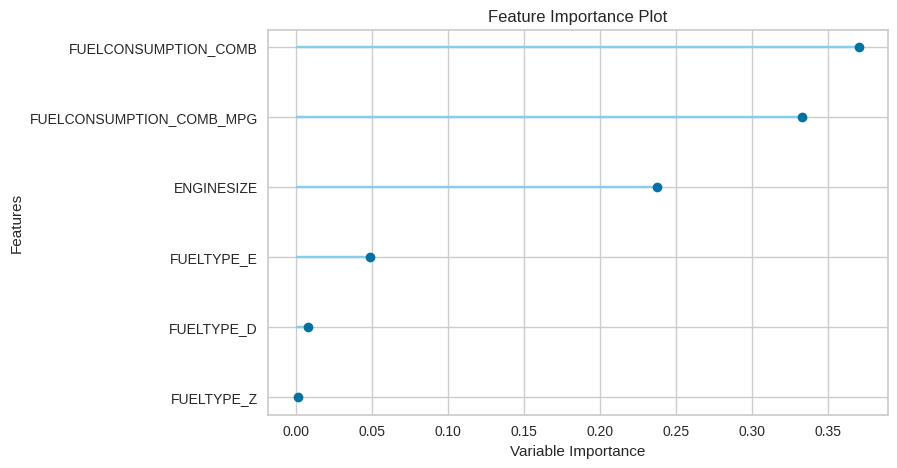

In [ ]:
plot_model(extra_tree, plot="feature")

Por fim, para visualizar o desempenho do modelo, faz-se a exibição dos resíduos para os conjuntos de treino e teste. Observa-se que, os dados estão distribuídos aleatoriamente em torno de 0.

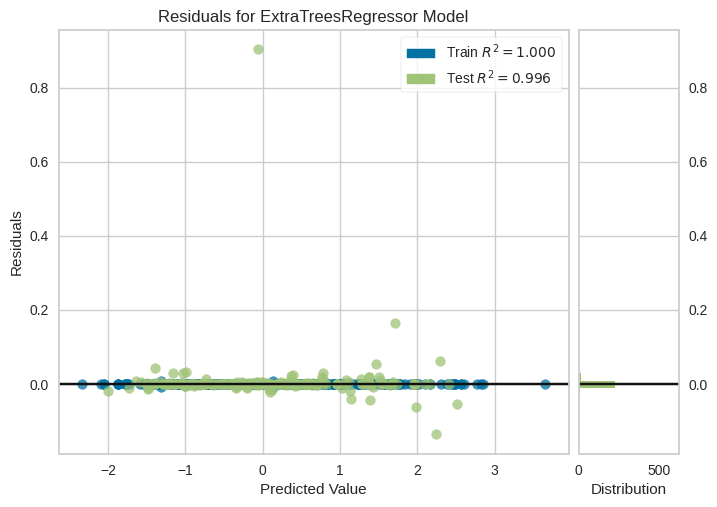

In [ ]:
plot_model(extra_tree, plot="residuals")

Com o gráfico de probabilidade normal observa-se que os erros seguem a distribuição normal.

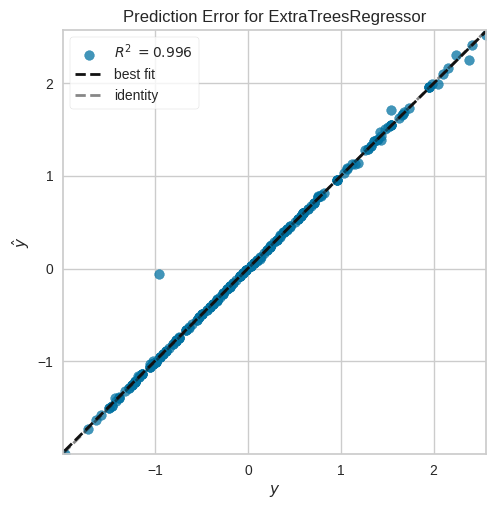

In [ ]:
plot_model(extra_tree, plot="error")

O desempenho do modelo no conjunto de teste.

In [ ]:
prediction = predict_model(extra_tree, df_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0084,0.0041,0.0641,0.9960,0.0428,0.0106


Nota-se que o modelo *Extra Trees Regressor* ajustado pelo PyCaret apresentou desempenho melhor do que os modelos de regressão linear ajustados anteriormente.

Visualizando as predições do modelo para o conjunto de teste.

In [ ]:
prediction

,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,FUELTYPE_D,FUELTYPE_E,FUELTYPE_Z,CO2EMISSIONS,prediction_label
0,0.956523,0.464735,-0.728905,-0.161126,-0.307179,1.207694,0.754174,0.773750
1,0.108606,-0.568572,0.342734,-0.161126,-0.307179,-0.828024,-0.556161,-0.556161
2,0.179265,0.349923,-0.594950,-0.161126,-0.307179,1.207694,0.596302,0.596302
3,-0.244694,-0.568572,0.342734,-0.161126,-0.307179,1.207694,-0.556161,-0.556161
4,-0.951292,-0.740789,0.610643,-0.161126,-0.307179,-0.828024,-0.777181,-0.777181
...,...,...,...,...,...,...,...,...
209,-0.951292,-0.683383,0.610643,-0.161126,-0.307179,-0.828024,-0.698245,-0.698245
210,-0.668653,-0.453760,0.208779,-0.161126,-0.307179,-0.828024,-0.414076,-0.414076
211,-0.668653,-0.425057,0.208779,-0.161126,-0.307179,-0.828024,-0.382502,-0.382502
212,-0.244694,-0.080621,-0.193086,-0.161126,-0.307179,1.207694,0.059538,0.059538


Os valores estão normalizados. A seguir é feita a conversão para a escala original para uma melhor comparação entre os valores de `CO2EMISSIONS` na base de testes e os valores preditos.

In [ ]:
yvar = np.var(data_reg['CO2EMISSIONS'])
ymean = np.mean(data_reg['CO2EMISSIONS'])

prediction['CO2EMISSIONS_orig_sc'] = prediction['CO2EMISSIONS'].apply(lambda x: round(x*np.sqrt(yvar)+ymean))
prediction['prediction_orig_sc'] = prediction['prediction_label'].apply(lambda x: x*np.sqrt(yvar)+ymean)

In [ ]:
round(prediction[['CO2EMISSIONS_orig_sc','prediction_orig_sc']].head(30),2)

,CO2EMISSIONS_orig_sc,prediction_orig_sc
0,304,305.24
1,221,221.00
2,294,294.00
3,221,221.00
4,207,207.00
5,246,246.00
6,259,259.00
7,310,310.00
8,310,310.00
9,264,264.00


## **7) Conclusão**

Neste projeto, o objetivo foi fazer a previsão da emissão de $CO_2$ de diferentes tipos de veículos, utilizando-se modelos de regressão tais como: Regressão Linear Múltipla, Lasso Regression, Ridge Regression e Elastic Net Regression.

Por meio da análise exploratória dos dados, foi observado que as variáveis são altamente correlacionadas entre si. Sendo assim, foi necessário escolher as variáveis mais importantes a serem incluídas nos modelos.

Pela análise dos gráficos scatter plot das variáveis em relação a `CO2EMISSIONS`, foi observado que aparece mais de uma relação linear, ou não linear no caso da variável `FUELCONSUMPTION_COMB_MPG`. Por isso, foi utilizado modelos de regressão com Dummy Variables, para indicar o tipo de combustível do veículo.

Ao utilizar o modelo de Regressão Linear Múltipla, foi notado que os erros não têm distribuição normal. Por isso, foram utilizados três métodos de reguralização para ajustar um modelo melhor para a predição de `CO2EMISSIONS`.

Sendo assim, foi obtido os seguintes resultados dos modelos:

In [ ]:
metricas = {"R2": [r2_lasso, r2_ridge, r2_elastic_net],
            "MAE": [mae_lasso, mae_ridge, mae_elastic_net],
            "MSE": [mse_lasso, mse_ridge, mse_elastic_net],
            "RMSE": [rmse_lasso, rmse_ridge, rmse_elastic_net]}

resultados = pd.DataFrame(metricas, index = ["Lasso Regression", "Ridge Regression", "Elastic Net"])

print('Resumo dos resultados:')
resultados

Resumo dos resultados:


,R2,MAE,MSE,RMSE
Lasso Regression,0.991729,0.057799,0.008257,0.090454
Ridge Regression,0.992052,0.055658,0.007926,0.088511
Elastic Net,0.992087,0.054410,0.007890,0.088254


Pela análise dos resultados, os três modelos têm resultados bastante próximos com métricas de avaliação muito boas. O modelo Elastic Net teve o valor de $R^2$ levemente mais elevado e o menor valor de $MAE$. Em relação ao $MSE$, o modelo Elastic Net tem o menor valor, seguido de perto pelo Ridge Regression.

In [ ]:
CVs = {"CV(Beta_1)": [CV_B1_reg_multi, CV_B1_lasso, CV_B1_ridge, CV_B1_elastic],
            "CV(Beta_2)": [CV_B2_reg_multi, CV_B2_lasso, CV_B2_ridge, CV_B2_elastic],
            "CV(Beta_3)": [CV_B3_reg_multi, CV_B3_lasso, CV_B3_ridge, CV_B3_elastic],
            "CV(Beta_4)": [CV_B4_reg_multi, CV_B4_lasso, CV_B4_ridge, CV_B4_elastic],
            "CV(Beta_5)": [CV_B5_reg_multi, CV_B5_lasso, CV_B5_ridge, CV_B5_elastic]}

resultados = pd.DataFrame(CVs, index = ["Regressão linear múltipla", "Lasso Regression", "Ridge Regression", "Elastic Net"])

print('Resumo dos resultados:')
resultados

Resumo dos resultados:


,CV(Beta_1),CV(Beta_2),CV(Beta_3),CV(Beta_4),CV(Beta_5)
Regressão linear múltipla,0.084547,0.015931,0.061503,0.016271,0.012387
Lasso Regression,0.065166,0.015664,0.053538,0.023883,0.011773
Ridge Regression,0.065579,0.014972,0.052068,0.016487,0.011744
Elastic Net,0.073678,0.015526,0.056953,0.016958,0.012055


Analisando a redução da variância dos cinco parâmetros estimados, observa-se que o modelo ajustado por regressão ridge tem os melhores resultados.

Para fazer a predição de `CO2EMISSIONS`, no geral, é possível utilizar qualquer um dos três modelos de regularização, pois as diferenças nas métricas de avaliação são mínimas. Entretanto, como o objetivo da regularização é usar as penalizações para introduzir um pequeno viés e reduzir a variância do estimador, a melhor escolha entre os modelos ajustados é o ridge regression, pois este mostrou um resultado mais estável para o estimador.

Ao final, também foi verificado que é possível obter resultados ainda melhores utilizando um modelo baseado em *Extra Trees Regressor*, um método *ensemble* que ajusta diversas árvores de decisão aleatórias em diferentes sub-amostras do conjunto de dados. Este resultado, indicado de forma automatizada pelo PyCaret, mostra que este tipo de modelo é uma excelente escolha para tentar melhorar a acurácia preditiva e controlar o *overfitting*.